In [1]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.path.dirname('../NEUROEVOLUTION'), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

parent_dir = os.path.abspath(os.path.join(os.path.dirname('../NEUROEVOLUTION/genetic_programming'), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)


parent_dir = os.path.abspath(os.path.join(os.path.dirname('../NEUROEVOLUTION/gpolnel'), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import pandas as pd

import sys

import torch.nn as nn
from NEUROEVOLUTION.utils import  drop_features,  load_best_params, complete_params,  extract_number, filter_dataframe, generate_niter_plots
from NEUROEVOLUTION.gpolnel.utils.ffunctions import Ffunctions


In [2]:
target = 'lactose'
file_path_X = '../datamart/data_project_nel.csv'
file_path_y = '../datamart/y_' + f'{target}'+ '.csv'
X = pd.read_csv(file_path_X)
X = drop_features(X)
y = pd.read_csv(file_path_y)[f'{target}'+ '_percent']


batch_size = X.shape[0]
shuffle = True
ffunction = Ffunctions('rmse')
loss_fn = nn.MSELoss()

In [3]:
gp_best_params = load_best_params('../genetic_programming/best_params/' + f'{target}' + '-best_params_final.pkl')
gp_best_params = complete_params(gp_best_params)
gp_log_train = pd.read_csv('logs/'+ f'{target}'+ '/gp_train.csv', sep=',',header=None)

gp_log_train.rename(columns={4: 'iterations', 7: 'train_score', 8: 'val_score'}, inplace=True)

gp_log_train = gp_log_train[['iterations', 'train_score', 'val_score']]

gp_log_train['val_score'] = gp_log_train['val_score'].astype(str) + ')'

gp_log_train['train_score'] = gp_log_train['train_score'].apply(extract_number)
gp_log_train['val_score'] = gp_log_train['val_score'].apply(extract_number)
gp_log_train = gp_log_train[['iterations', 'train_score', 'val_score']]

gp_filtered_df = filter_dataframe(gp_log_train, gp_best_params)


In [4]:
ne_best_params = load_best_params('../neuroevolution_gpol_based/best_params/' + f'{target}' + '-best_params_final.pkl')
ne_best_params = complete_params(ne_best_params)
ne_log_train = pd.read_csv('logs/'+ f'{target}'+ '/ne_train.csv', sep=',',header=None)
ne_log_train = ne_log_train.head(ne_best_params['n_iter']*10+10)
ne_log_train.rename(columns={4: 'iterations', 7: 'train_score', 8: 'val_score'}, inplace=True)
ne_log_train.rename(columns={4: 'iterations', 7: 'train_score', 8: 'val_score'}, inplace=True)

ne_log_train = ne_log_train[['iterations', 'train_score', 'val_score']]

ne_log_train['val_score'] = ne_log_train['val_score'].astype(str) + ')'

ne_log_train['train_score'] = ne_log_train['train_score'].apply(extract_number)
ne_log_train['val_score'] = ne_log_train['val_score'].apply(extract_number)
ne_log_train = ne_log_train[['iterations', 'train_score', 'val_score']]
ne_filtered_df = filter_dataframe(ne_log_train, ne_best_params)

In [5]:
neat_log_train = pd.read_csv('logs/'+ f'{target}'+ '/neat_train.csv', delimiter=';', skiprows=1, names=['generation', 'train_score', 'val_score'])


neat_log_train['generation'] = neat_log_train['generation'].astype(int)
neat_log_train['train_score'] = neat_log_train['train_score'].astype(float)
neat_log_train['val_score'] = neat_log_train['val_score'].astype(float)
neat_log_train.rename(columns={'generation': 'iterations'}, inplace=True)
neat_best_params = load_best_params('../neuroevolution_augmentingtopologies/best_params/' + f'{target}' + '-best_params_final.pkl')
neat_filtered_df = filter_dataframe(neat_log_train, neat_best_params)


In [6]:
nn_log_train = pd.read_csv('logs/'+ f'{target}'+ '/nn_train.csv', sep=';',index_col=False)
nn_log_train = nn_log_train.drop(columns=['val_score'])
nn_log_train.columns = ['iterations', 'train_score', 'val_score']

nn_log_train['train_score'] = nn_log_train['train_score'].astype(str) + ')'
nn_log_train['val_score'] = nn_log_train['val_score'].astype(str) + ')'


nn_log_train['train_score'] = nn_log_train['train_score'].apply(extract_number)
nn_log_train['val_score'] = nn_log_train['val_score'].apply(extract_number)
nn_log_train = nn_log_train[nn_log_train.iterations != "id"]
nn_log_train['iterations'] = nn_log_train['iterations'].astype(int)


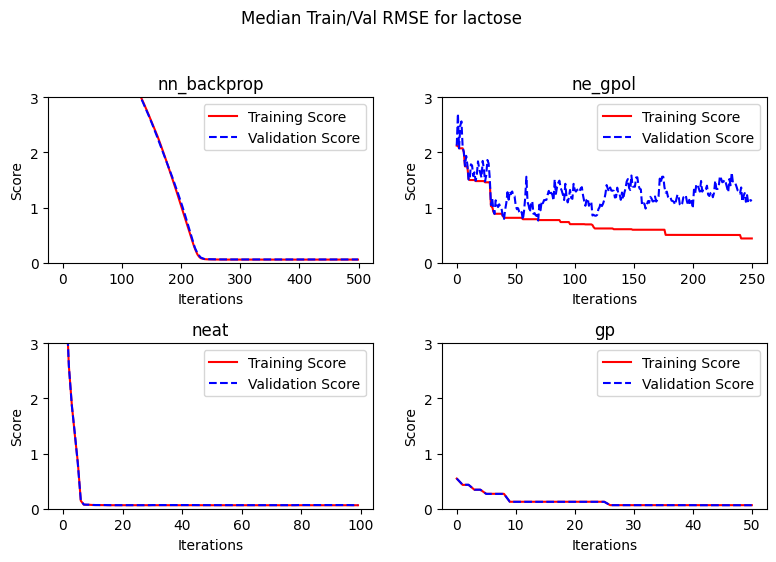

In [7]:
dataframes = [
    nn_log_train,
    
    ne_filtered_df,
    neat_filtered_df,
    gp_filtered_df
]

titles = [
    'nn_backprop',
    
    'ne_gpol',
    'neat',
    'gp'
]

generate_niter_plots(dataframes, titles, target)
